# Regressions

## Setup

In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import requests
import bokeh.plotting as bk
from bokeh.models import HoverTool, Label, BoxZoomTool, PanTool, ZoomInTool, ZoomOutTool, ResetTool
from pandas.plotting._converter import DatetimeConverter

company_symbol = 'AAPL'

## Request To API

In [2]:
res = requests.get(f'https://api.iextrading.com/1.0/stock/{company_symbol}/chart/5y')
data = res.json()
df = pd.DataFrame(data)

## Datetime of DataFrame

In [3]:
df['date_pd'] = pd.to_datetime(df.date)
df['year'] = df.date_pd.dt.year

## CandleStick Picture

In [4]:
seqs = np.arange(df.shape[0])
df['seqs'] = pd.Series(seqs)
df.sample(3)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,date_pd,year,seqs
1237,-7.670000,1.582027,-3.963,185.8600,2018-11-19,190.7000,Nov 19,184.9900,190.0000,41920872,41920872,186.9198,2018-11-19,2018,1237
1124,-0.466730,1.638140,-0.245,189.8991,2018-06-11,190.6339,"Jun 11, 18",188.8862,190.0182,18308460,18308460,189.8562,2018-06-11,2018,1124
832,0.165548,0.918358,0.120,138.0876,2017-04-12,138.4284,"Apr 12, 17",137.3183,137.8928,20350000,20350000,137.8338,2017-04-12,2017,832


In [5]:
df['mid'] = (df.high + df.low) //2

df['height'] = df.apply(
    lambda x: x['close'] - x['open'] if x['close'] != x['open'] else 0.01,
    axis=1
)


In [6]:
inc = df.close > df.open
dec = df.close < df.open
w = .3

sourceInc = bk.ColumnDataSource(df.loc[inc])
sourceDec = bk.ColumnDataSource(df.loc[dec])

In [7]:
hover = HoverTool(
    tooltips=[
        ('Date', '@date'),
        ('Low', '@low'),
        ('High', '@high'),
        ('Open', '@open'),
        ('Close', '@close'),
        ('Mid', '@mid'),
    ]
)

TOOLS = [hover, BoxZoomTool(), PanTool(), ZoomInTool(), ZoomOutTool(), ResetTool()]

In [8]:
p = bk.figure(plot_width=1200, plot_height=800, title= f'{company_symbol}' , tools=TOOLS, toolbar_location='above')


p.xaxis.major_label_orientation = np.pi/4
p.grid.grid_line_alpha = w


descriptor = Label(x=70, y=70, text='5-Year Data Of Your Chosen Company')
p.add_layout(descriptor)

p.segment(df.seqs[inc], df.high[inc], df.seqs[inc], df.low[inc], color='green')


GlyphRenderer(id='1043', ...)

In [9]:
p.segment(df.seqs[dec], df.high[dec], df.seqs[dec], df.low[dec], color='red')

GlyphRenderer(id='1050', ...)

In [10]:
p.rect(x='seqs', y='mid', width=w, height='height', fill_color='red', line_color='red', source=sourceDec)

GlyphRenderer(id='1057', ...)

In [11]:
p.rect(x='seqs', y='mid', width=w, height='height', fill_color='green', line_color='green', source=sourceInc)

GlyphRenderer(id='1064', ...)

In [12]:
bk.show(p)

## Stocks.py

In [13]:
from bokeh.layouts import gridplot

def datetime(x):
    return np.array(x, dtype=np.datetime64)

p1 = bk.figure(x_axis_type="datetime", title=f'Company: {company_symbol}', toolbar_location='above')
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'




In [14]:
p1.line(datetime(df['date']), df['open'], color='yellow', legend=f'{company_symbol}')
p1.line(datetime(df['date']), df['close'], color='purple', legend=f'{company_symbol}')
p1.line(datetime(df['date']), df['high'], color='red', legend=f'{company_symbol}')
p1.line(datetime(df['date']), df['low'], color='green', legend=f'{company_symbol}')
p1.line(datetime(df['date']), df['mid'], color='black', legend=f'{company_symbol}')

p1.legend.location = "top_left"
bk.show(p1)


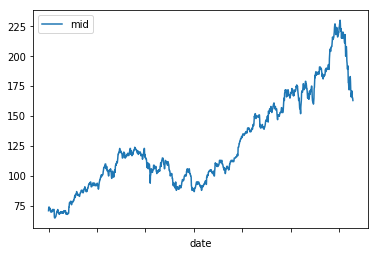

In [15]:
df.plot(x='date', y='mid')

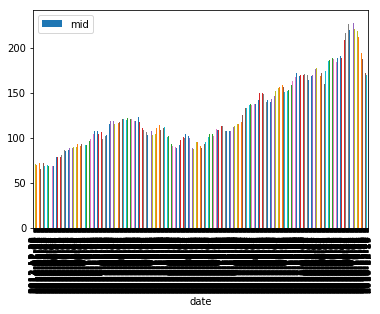

In [16]:
df.plot(x='date', y='mid', kind='bar')